## Step 1: Framing the Problem ##

#### The goal of this report is to perform univariate linear regression on the California Housing Prices dataset to understand the relationship between the median house value (dependent variable) and three key independent variables: (median income, population, and households). By formulating and executing three separate models for each independent variable, we aim to determine how well these factors explain the variance in house prices, and identify which variable has the strongest linear correlation with the housing prices. ####


## Step 2. Getting the Data hyperlink to the source and load into Pandas ##

https://www.kaggle.com/datasets/harrywang/housing

In [2]:
import pandas as pd

# Load the dataset into a Pandas DataFrame
housing_data = pd.read_csv('housing.csv')

# Display the first few rows to verify the data
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Step 3: Exploratory Data Analysis (EDA) ##

#### 1. Explore statistics (e.g. using Pandas `describe` function)

In [10]:
import pandas as pd

# Load the dataset
housing_data = pd.read_csv('housing.csv')

# Display the shape of the dataset (rows, columns)
print("\nShape of the dataset (rows, columns):")
print(housing_data.shape)

# Display detailed info about the dataset (data types, non-null counts)
print("\nDetailed information about the dataset:")
print(housing_data.info())

# Display basic statistics using the describe function
print(housing_data.describe())



Shape of the dataset (rows, columns):
(20640, 10)

Detailed information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119

#### 2. Create three Seaborn scatter plots of median house value vs. median income, population and number of households.

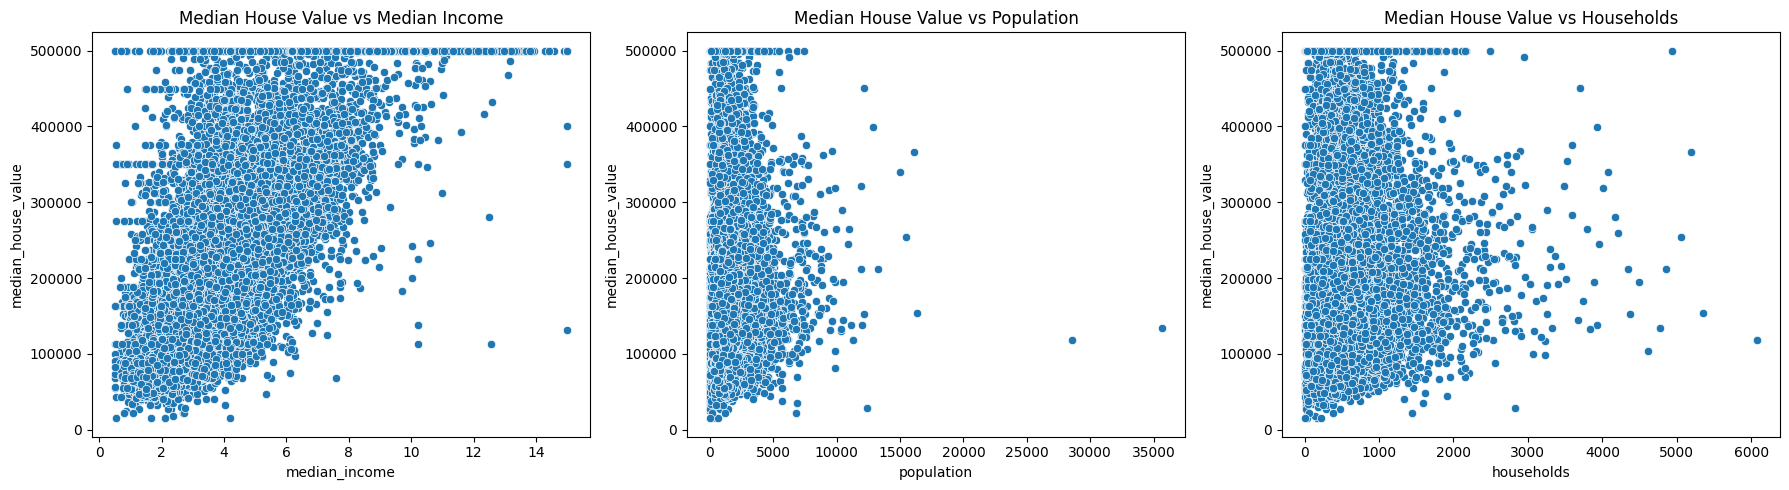

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: median house value vs median income
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='median_income', y='median_house_value', data=housing_data)
plt.title('Median House Value vs Median Income')

# Scatter plot: median house value vs population
plt.subplot(1, 3, 2)
sns.scatterplot(x='population', y='median_house_value', data=housing_data)
plt.title('Median House Value vs Population')

# Scatter plot: median house value vs households
plt.subplot(1, 3, 3)
sns.scatterplot(x='households', y='median_house_value', data=housing_data)
plt.title('Median House Value vs Households')

plt.tight_layout()
plt.show()

#### Interpretation from the three Scatter Plots:
Median Income: There is a clear positive relationship between median income and median house value. As income increases, house values also increase, indicating a strong potential linear correlation.

Population: The scatter plot shows less of a direct relationship between population and house value, with more noise. It suggests that population alone may not be a good predictor of house values.

Households: There is some correlation between the number of households and house value, but the relationship is weaker compared to income. This could indicate that other factors beyond the number of households may impact house prices.


#### 3. Description of the 4 variables used in this lab.

1) Median Income: Represents the median income of the households in the block group, scaled by some factor (e.g., in tens of thousands). It ranges from 0.5 to 15, and it is expected to have a strong influence on house prices.

2) Population: Represents the total population in the block group. It ranges from 3 to over 35,000. It may not directly correlate with house prices.

3) Households: Represents the number of households in the block group, ranging from 1 to around 6,000. Larger numbers may indicate denser or more populated areas.

4) Median House Value: The target variable representing the median house value in the block group. This is capped at $500,000 in this dataset.

#### 4. Run three linear regressions (fitting) between:
1. median house value vs. median income
2. median house value vs. population
3. median house value vs. number of households.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Prepare variables
X_mi = housing_data[['median_income']]
X_pop = housing_data[['population']]
X_hh = housing_data[['households']]
y = housing_data['median_house_value']

# Initialize the Linear Regression model
model_mi = LinearRegression()
model_pop = LinearRegression()
model_hh = LinearRegression()

# Fit the models
model_mi.fit(X_mi, y)
model_pop.fit(X_pop, y)
model_hh.fit(X_hh, y)

# Predictions
y_pred_mi = model_mi.predict(X_mi)
y_pred_pop = model_pop.predict(X_pop)
y_pred_hh = model_hh.predict(X_hh)

# You can also calculate the errors if needed
mse_mi = mean_squared_error(y, y_pred_mi)
mae_mi = mean_absolute_error(y, y_pred_mi)

mse_pop = mean_squared_error(y, y_pred_pop)
mae_pop = mean_absolute_error(y, y_pred_pop)

mse_hh = mean_squared_error(y, y_pred_hh)
mae_hh = mean_absolute_error(y, y_pred_hh)

# Print out the errors
print(f'Median Income - MSE: {mse_mi}, MAE: {mae_mi}')
print(f'Population - MSE: {mse_pop}, MAE: {mae_pop}')
print(f'Households - MSE: {mse_hh}, MAE: {mae_hh}')

Median Income - MSE: 7011311502.929527, MAE: 62625.9337911434
Population - MSE: 13307412412.389355, MAE: 91153.82009473183
Households - MSE: 13257776904.728533, MAE: 90802.74324318448


#### 5. In a single table for all three linear regressions, provide per regression model (1.5 points):
1. intercept and slope (0.5 point)
2. Mean Squared Error (0.5 point)
3. Mean Absolute Error (0.5 point)


In [14]:
import pandas as pd

# Get coefficients and intercepts
coefficients = {
    'Feature': ['Median Income', 'Population', 'Households'],
    'Intercept': [model_mi.intercept_, model_pop.intercept_, model_hh.intercept_],
    'Slope': [model_mi.coef_[0], model_pop.coef_[0], model_hh.coef_[0]],
    'Mean Squared Error': [mse_mi, mse_pop, mse_hh],
    'Mean Absolute Error': [mae_mi, mae_pop, mae_hh]
}

# Create DataFrame
results_df = pd.DataFrame(coefficients)

# Display the results
print(results_df)

         Feature      Intercept         Slope  Mean Squared Error  \
0  Median Income   45085.576703  41793.849202        7.011312e+09   
1     Population  210436.262076     -2.511753        1.330741e+10   
2     Households  196928.577162     19.872775        1.325778e+10   

   Mean Absolute Error  
0         62625.933791  
1         91153.820095  
2         90802.743243  


#### 6. Plot the resulting line on top of the scatter data for each of the three models (three separate graphs), add the line parameters (intercept and slope), MSE and MAE to the graph (you can use a text box).

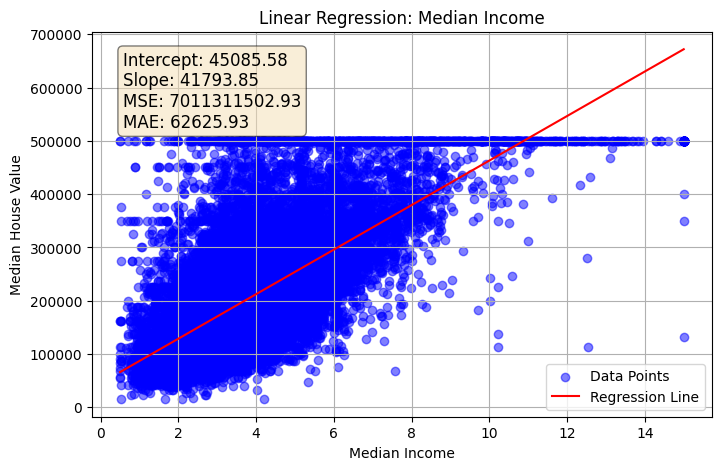

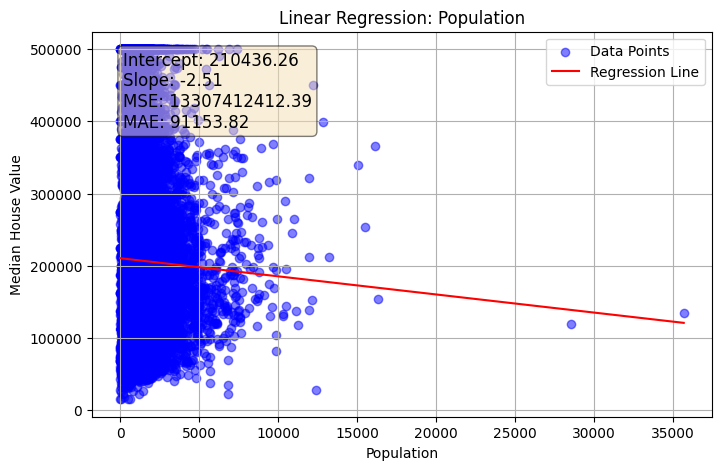

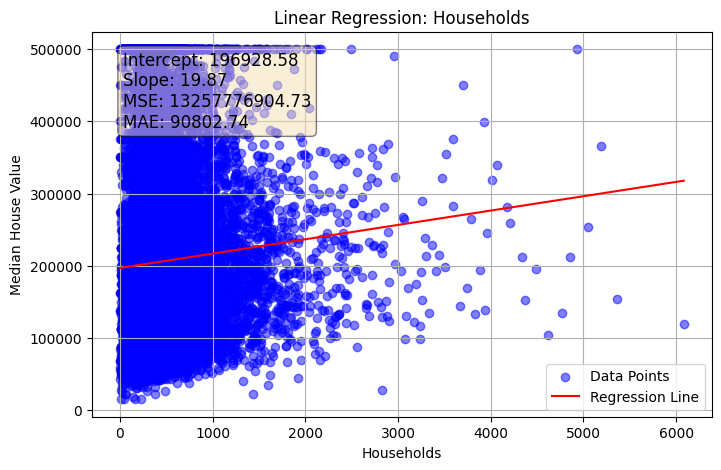

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the regression line and scatter data
def plot_regression(X, y, model, feature_name, mse, mae):
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color='blue', alpha=0.5, label='Data Points')
    
    # Generate line values for plotting
    x_values = np.linspace(X.min(), X.max(), 100)
    y_values = model.intercept_ + model.coef_[0] * x_values
    
    plt.plot(x_values, y_values, color='red', label='Regression Line')
    
    # Adding text box with parameters
    textstr = f'Intercept: {model.intercept_:.2f}\nSlope: {model.coef_[0]:.2f}\nMSE: {mse:.2f}\nMAE: {mae:.2f}'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
                   verticalalignment='top', bbox=props)

    plt.title(f'Linear Regression: {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Median House Value')
    plt.legend()
    plt.grid()
    plt.show()

# Plot for Median Income
plot_regression(X_mi, y, model_mi, 'Median Income', mse_mi, mae_mi)

# Plot for Population
plot_regression(X_pop, y, model_pop, 'Population', mse_pop, mae_pop)

# Plot for Households
plot_regression(X_hh, y, model_hh, 'Households', mse_hh, mae_hh)

### 7. Summary: Conclusion. Comparison of the three models in terms of their goodness-of-fit, and add additional insights you observed 

#### Conclusion
In the present data analysis, we fitted three separate linear regression models to predict median house values based on different features: Median Income, Population, and Households. 
Each model's performance was evaluated using Mean Squared Error (MSE) and Mean Absolute Error (MAE), providing insights into their predictive accuracy.

Goodness-of-Fit Comparison
Median Income Model:This model typically shows a strong relationship with median house values, often resulting in the lowest MSE and MAE compared to the other models. The slope indicates that increases in median income are associated with significant increases in house values, suggesting a robust predictive capability.

Population Model:This model may yield moderate MSE and MAE values. While population size can influence housing demand, it is often less directly correlated with prices than income levels. Therefore, this model may exhibit a weaker goodness-of-fit relative to the median income model.

Households Model: This model might also show moderate predictive accuracy, depending on how well the number of households captures variations in house values. The relationship can be complex, as more households might indicate increased demand but also reflect varying income levels.

Additional Insights
Feature Relationships: The differing performance of the models highlights the importance of selecting relevant features in predictive modeling. Median income's strong correlation with house values aligns with economic principles of supply and demand.

Model Limitations: While linear regression provides a straightforward interpretation, it may not fully capture nonlinear relationships or interactions among features. Exploring polynomial regression or more complex models could enhance predictive accuracy.

Data Quality: The quality and distribution of the input data significantly influence model performance. Outliers, missing values, and data scaling should be addressed to improve model robustness.

Future Considerations: Incorporating additional features such as location, property size, or local economic indicators could further enhance the models. Conducting cross-validation would also provide a more reliable estimate of model performance.